# 决策树原理

In [1]:
import numpy as np

In [3]:
X = np.loadtxt('x.txt')
X = X[:, 2:]
y = np.loadtxt('y.txt')

In [4]:
import matplotlib.pyplot as plt

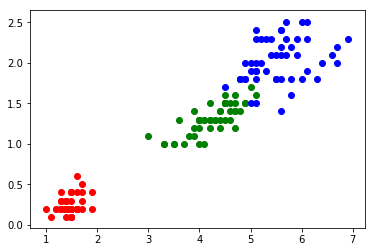

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='g')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='b')
plt.show()

In [9]:
from collections import Counter
def gini(y):
    counter = Counter(y)
    result = 0
    for v in counter.values():
        result += (v / len(y))**2
    return 1 - result

def cut(X, y, d, v):
    left_index = (X[:, d] <= v)
    right_index = (X[:, d] > v)
    return X[left_index], X[right_index], y[left_index], y[right_index]

def try_split(X, y):
    best_g = 1
    best_d = -1
    best_v = -1
    
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:, d])
        for i in range(len(X)-1):
            if X[sorted_index[i], d] == X[sorted_index[i + 1], d]:
                continue
            
            v = (X[sorted_index[i], d] + X[sorted_index[i + 1], d]) / 2
            # print('d={}, v={}'.format(d, v))
            X_left, X_right, y_left, y_right = cut(X, y, d, v)
            
            g_all = gini(y_left) + gini(y_right)
            
            # print('d={}, v={}, g={}'.format(d, v, g_all))
            
            if g_all < best_g:
                best_g = g_all
                best_d = d
                best_v = v
    return best_d, best_v, best_g

In [10]:
try_split(X, y)

(0, 1.9, 0.5)

In [22]:
class Node():
    def __init__(self, d=None, v=None, g=None, l=None):
        self.dim = d
        self.value = v
        self.gini = g
        self.label = l
        
        self.children_left = None
        self.children_right = None
    def __repr__(self):
        return "d={}, v={}, g={}, l={}".format(self.dim, self.value, self.gini, self.label)

In [25]:
def create_tree(X, y):
    d, v, g = try_split(X, y)
    if d == -1 or g == 0:     # 不能再进行划分时
        return None

    node = Node(d, v, g)
    
    X_left, X_right, y_left, y_right = cut(X, y, d, v)
    
    node.children_left = create_tree(X_left, y_left)
    if node.children_left is None:
        label = Counter(y_left).most_common(1)[0][0]
        node.children_left = Node(l = label)
    
    node.children_right = create_tree(X_right, y_right)
    if node.children_right is None:
        label = Counter(y_right).most_common(1)[0][0]
        node.children_right = Node(l = label)
        
    return node

In [26]:
tree = create_tree(X, y)
tree

d=0, v=1.9, g=0.5, l=None

In [27]:
tree.children_left

d=None, v=None, g=None, l=0.0

In [28]:
tree.children_right

d=1, v=1.7, g=0.21057149006459386, l=None